<a href="https://colab.research.google.com/github/nyary-ben/Homework-3B/blob/main/Homework3B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install whit-phys-util 1>/dev/null

In [2]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import whit_phys_util as buc
from scipy.special import comb

Mounted at /content/drive


In [3]:
repo = buc.local_repository("https://github.com/nyary-ben/Homework-3B")

Cloning repository from GitHub.


## Homework 3.25)

### part g)

In [21]:
N = 50
qTotal = 80
def Omega (N,q):
  return comb(q+N-1, q)
df = pd.DataFrame(data={'q': np.arange(qTotal+1)})
df['Omega'] = Omega(N,df['q'])
df['S/k'] = np.log(df['Omega'])
Temp = (df['q'].diff(2)/df['S/k'].diff(2))
df['kT/eps'] = Temp.shift(periods=-1)
df.loc[0, ['kT/eps']] = 0
C = (df['q'].diff(2)/df['kT/eps'].diff(2))/N
df['C/Nk'] = C.shift(periods=-1)

df


,q,Omega,S/k,kT/eps,C/Nk
0,0,1.000000e+00,0.000000,0.000000,NaN
1,1,5.000000e+01,3.912023,0.279693,0.121826
2,2,1.275000e+03,7.150701,0.328337,0.453606
3,3,2.210000e+04,10.003333,0.367875,0.536184
4,4,2.928250e+05,12.587330,0.402938,0.593742
...,...,...,...,...,...
76,76,1.641518e+35,81.086100,2.020086,0.960200
77,77,2.686121e+35,81.578576,2.040911,0.960597
78,78,4.373555e+35,82.066054,2.061727,0.960983
79,79,7.086267e+35,82.548637,2.082535,NaN


(0.0, 2.0)

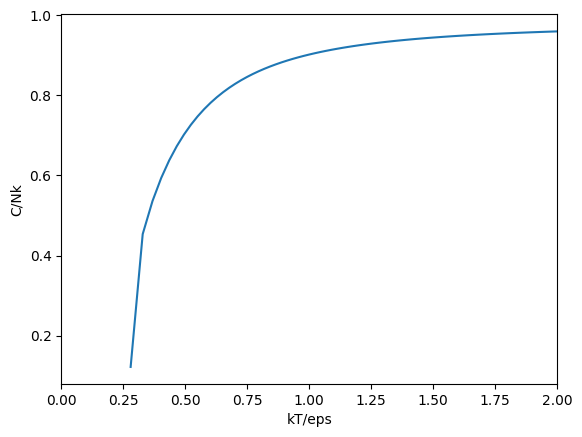

In [20]:
fig, ax = plt.subplots()
ax.plot(df['kT/eps'], df['C/Nk'])
ax.set_xlabel('kT/eps')
ax.set_ylabel('C/Nk')
ax.set_xlim(0,2)

### part h)
Using the same method as 3.24), I have found the 50% value of C/Nk to be around when $q = 3$ and $T = \frac{0.36\epsilon}{k}$.

I will use the same 50% value of C method to find the temperature at the respecitve solids:


*   Lead = 27K
*   Aluminim = 85K
*   Diamond =270K



In [23]:
k = 8.617*10**-5 #eV
def epsilon(T):
  return k*T/0.36

### Lead

In [31]:
epsilon(27)


0.0064627500000000015

$\epsilon \approx 0.006 eV$ for Lead

### Aluminium

In [25]:
epsilon(85)

0.020345694444444447

$\epsilon \approx 0.02 eV$ for Aluminium

### Diamond

In [28]:
epsilon(270)


0.0646275

$\epsilon \approx 0.06 eV$ for Diamond